In [1]:
import re
import string
from unicodedata import normalize
from functools import reduce, partial

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.tokenize import WordPunctTokenizer
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [2]:
pd.set_option('display.max_colwidth', 500000)

In [3]:
emails = pd.read_csv('./datasets/spam-dataset.csv')

In [4]:
emails.head()

label  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                                                                                          text  
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                Ok lar... Joking wif u oni...  
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                            U dun say so early hor... U c already then say...  
4                                                                                                Nah I don't think he goes to usf, he lives around here though

In [5]:
emails.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
emails[emails.label == 'ham'].iloc[3].text

"Nah I don't think he goes to usf, he lives around here though"

In [7]:
emails[emails.label == 'spam'].iloc[3].text

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [8]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)

In [9]:
bag_of_words = vectorizer.fit_transform(emails.text)

In [10]:
features = vectorizer.get_feature_names()

In [11]:
print(features)

['You', 'all', 'and', 'are', 'at', 'be', 'but', 'call', 'can', 'come', 'do', 'for', 'from', 'get', 'go', 'got', 'gt', 'have', 'if', 'in', 'is', 'it', 'just', 'know', 'like', 'll', 'lt', 'me', 'my', 'not', 'now', 'of', 'on', 'or', 'out', 'so', 'that', 'the', 'there', 'this', 'to', 'up', 'ur', 'was', 'we', 'when', 'will', 'with', 'you', 'your']


In [12]:
pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=features)

You  all  and  are  at  be  but  call  can  come  ...  to  up  ur  was  \
0       0    0    0    0   0   0    0     0    0     0  ...   0   0   0    0   
1       0    0    0    0   0   0    0     0    0     0  ...   0   0   0    0   
2       0    0    0    0   0   0    0     0    0     0  ...   3   0   0    0   
3       0    0    0    0   0   0    0     0    0     0  ...   0   0   0    0   
4       0    0    0    0   0   0    0     0    0     0  ...   1   0   0    0   
...   ...  ...  ...  ...  ..  ..  ...   ...  ...   ...  ...  ..  ..  ..  ...   
5567    0    0    0    0   0   0    0     1    0     0  ...   0   0   0    0   
5568    0    0    0    0   0   0    0     0    0     0  ...   1   0   0    0   
5569    0    0    0    0   0   0    0     0    0     0  ...   0   0   0    1   
5570    0    0    1    0   0   1    1     0    0     0  ...   1   0   0    0   
5571    0    0    0    0   0   0    0     0    0     0  ...   1   0   0    0   

      we  when  will  with  you  your  
0      0     0     0     0    0     0  
1      0     0     0     0    0     0  
2      0     0     0     0    0     0  
3      0     0     0     0    0     0  
4      0     0     0     0    0     0  
...   ..   ...   ...   ...  ...   ...  
5567   1     0     0     0    0     0  
5568   0     0     0     0    0     0  
5569   0     0     0     0    0     0  
5570   0     0     0     0    0     0  
5571   0     0     0     0    0     0  

[5572 rows x 50 columns]

In [13]:
emails.text[:3].to_list()

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [14]:
TOKENIZER = WordPunctTokenizer()
STEMMER = PorterStemmer()
STOPWORDS = stopwords.words("english")

In [15]:
def wordcloud(dataframe, column): 
    all_words = ' '.join(dataframe[column].to_list())
    
    word_cloud = WordCloud(width=1024, height=768, background_color='white', contour_color='steelblue', )
    
    image = word_cloud.generate(all_words)
    
    plt.figure(figsize=(20,10))
    plt.imshow(image)
    plt.show()
    
    

In [16]:
def bar_comparison(dataframe, column, n):
    all_words = ' '.join(dataframe[column].to_list())
    
    tokens = TOKENIZER.tokenize(all_words)
    
    word_frequences = FreqDist(tokens)
    
    word_frequence_dataframe = pd.DataFrame({'word': list(word_frequences.keys()), 'rate': list(word_frequences.values()) })
    
    top_rated_words = word_frequence_dataframe.nlargest(columns='rate', n=n)
    
    total_rate = top_rated_words.rate.sum()
    
    top_rated_words['perc_rate'] = top_rated_words.rate.cumsum() / total_rate * 100
    
    plt.figure(figsize=(20,10))
    
    sns.barplot(data=top_rated_words, x='word', y='perc_rate')
    
    plt.show()
    

In [17]:
def _remove_numbers(input_text):
    return re.sub(r'\d+','',input_text)

In [18]:
def _trim_text(input_text): 
    return input_text.strip()

In [19]:
def _to_lower_case(input_text):
    return input_text.lower()

In [20]:
def _decompose_word(input_text):
    return re.sub(r'\b(\w+)\b-\b(\w+)\b', r'\1 \2', input_text)

In [21]:
def _remove_accents(input_text):
    return normalize('NFKD', input_text).encode('ASCII', 'ignore').decode('ASCII')

In [22]:
def _remove_punctuation(input_text): 
    return input_text.translate(str.maketrans('', '', string.punctuation))

In [23]:
def pipe(arg, *funcs):
    return reduce(lambda current_value, func: func(current_value), funcs, arg)

In [24]:
def normalize_text(input_text):
    
    normalize_pipe = partial(pipe, input_text)
    
    return normalize_pipe( _remove_numbers, 
                   _to_lower_case, 
                   _decompose_word, 
                   _remove_punctuation, 
                   _remove_accents, 
                   _trim_text )
    

In [25]:
emails['normalized_text'] = emails.text.apply(normalize_text)

In [26]:
emails

label  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                   text  \
0                                                       Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                         Ok lar... Joking wif u oni...   
2           Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                                     U dun say so early hor... U c already then say...   
4                                                                                                         Nah I don't think he goes to usf, he lives around here though   
...                                                                                                                                                                 ...   
5567  This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.   
5568                                                                                                                              Will Ì_ b going to esplanade fr home?   
5569                                                                                                          Pity, * was in mood for that. So...any other suggestions?   
5570                                      The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free   
5571                                                                                                                                         Rofl. Its true to its name   

                                                                                                                           normalized_text  
0                                   go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat  
1                                                                                                                  ok lar joking wif u oni  
2             free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs  
3                                                                                              u dun say so early hor u c already then say  
4                                                                              nah i dont think he goes to usf he lives around here though  
...                                                                                                                                    ...  
5567  this is the nd time we have tried  contact u u have won the a pound prize  claim is easy call  now only p per minute bt nationalrate  
5568                                                                                                   will i b going to esplanade fr home  
5569                                                                                    pity  was in mood for that soany other suggestions  
5570          the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free  
5571                                                                                                             rofl its true to its name  

[5572 rows x 3 columns]

In [27]:
def _is_a_stopword(text):
    return text in STOPWORDS

def _stemmize(text):
    return STEMMER.stem(text)


def pre_processing_text(input_text):
    tokens = TOKENIZER.tokenize(input_text)
    
    filtered_tokens = [ _stemmize(token) for token in tokens if not _is_a_stopword(token) ]

    
    return ' '.join(filtered_tokens)

In [28]:
emails['proccessed_text'] = emails.normalized_text.apply(pre_processing_text)

In [29]:
emails

label  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                   text  \
0                                                       Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                         Ok lar... Joking wif u oni...   
2           Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                                     U dun say so early hor... U c already then say...   
4                                                                                                         Nah I don't think he goes to usf, he lives around here though   
...                                                                                                                                                                 ...   
5567  This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.   
5568                                                                                                                              Will Ì_ b going to esplanade fr home?   
5569                                                                                                          Pity, * was in mood for that. So...any other suggestions?   
5570                                      The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free   
5571                                                                                                                                         Rofl. Its true to its name   

                                                                                                                           normalized_text  \
0                                   go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat   
1                                                                                                                  ok lar joking wif u oni   
2             free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs   
3                                                                                              u dun say so early hor u c already then say   
4                                                                              nah i dont think he goes to usf he lives around here though   
...                                                                                                                                    ...   
5567  this is the nd time we have tried  contact u u have won the a pound prize  claim is easy call  now only p per minute bt nationalrate   
5568                                                                                                   will i b going to esplanade fr home   
5569                                                                                    pity  was in mood for that soany other suggestions   
5570          the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free   
5571                                                                                                             rofl its true to its name   

                                                                              

In [30]:
is_spam = emails.label == 'spam'

spams = emails[is_spam]
no_spams = emails[~is_spam]
               

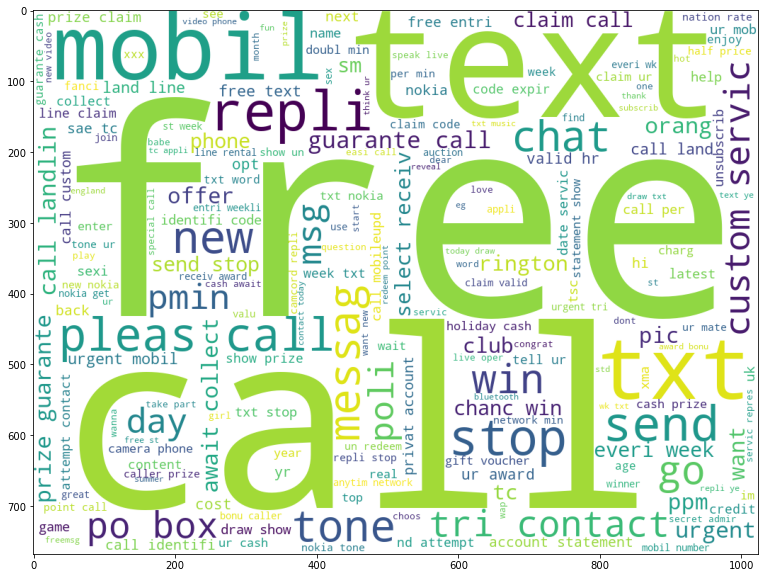

In [31]:
wordcloud(spams, 'proccessed_text')

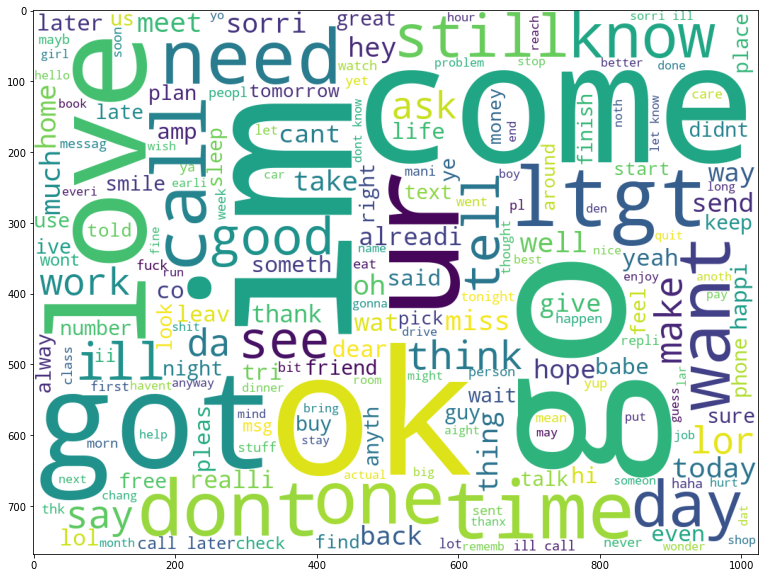

In [32]:
wordcloud(no_spams, 'proccessed_text')

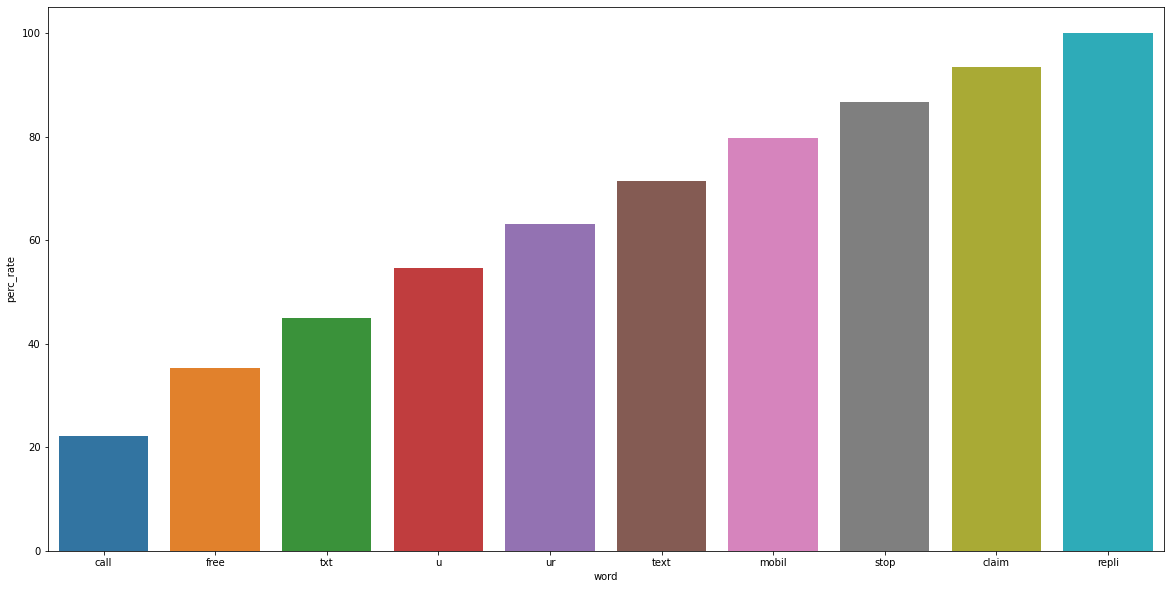

In [33]:
bar_comparison(spams, 'proccessed_text', 10)

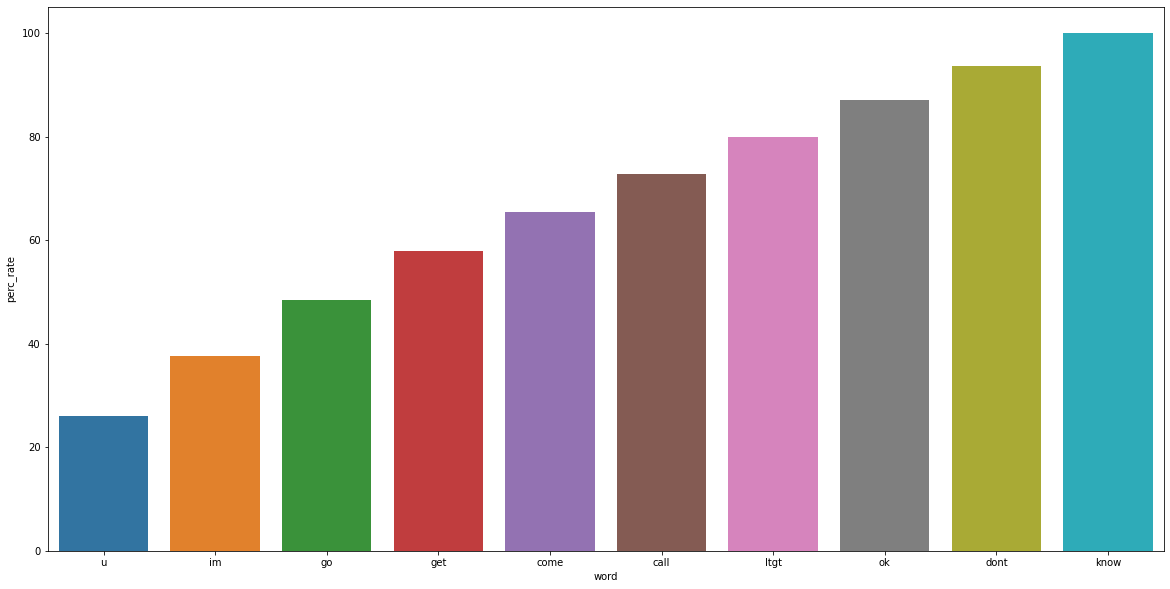

In [34]:
bar_comparison(no_spams, 'proccessed_text', 10)

In [35]:
binarizer = LabelBinarizer()


emails['category'] = binarizer.fit_transform(emails.label)


In [36]:
emails

label  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                   text  \
0                                                       Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                         Ok lar... Joking wif u oni...   
2           Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                                     U dun say so early hor... U c already then say...   
4                                                                                                         Nah I don't think he goes to usf, he lives around here though   
...                                                                                                                                                                 ...   
5567  This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.   
5568                                                                                                                              Will Ì_ b going to esplanade fr home?   
5569                                                                                                          Pity, * was in mood for that. So...any other suggestions?   
5570                                      The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free   
5571                                                                                                                                         Rofl. Its true to its name   

                                                                                                                           normalized_text  \
0                                   go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat   
1                                                                                                                  ok lar joking wif u oni   
2             free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs   
3                                                                                              u dun say so early hor u c already then say   
4                                                                              nah i dont think he goes to usf he lives around here though   
...                                                                                                                                    ...   
5567  this is the nd time we have tried  contact u u have won the a pound prize  claim is easy call  now only p per minute bt nationalrate   
5568                                                                                                   will i b going to esplanade fr home   
5569                                                                                    pity  was in mood for that soany other suggestions   
5570          the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free   
5571                                                                                                             rofl its true to its name   

                                                                              

In [37]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

whole_training_data = tfidf.fit_transform(emails.proccessed_text)

In [38]:
training_data, test_data, training_category_data, test_category_data = train_test_split(whole_training_data, emails.category, test_size=.3, random_state=64)

In [39]:
model = LogisticRegression()
model.fit(training_data, training_category_data)

LogisticRegression()

In [40]:
prediction = model.predict(test_data)

In [41]:
model.score(test_data, test_category_data)

0.9599282296650717

In [42]:
pd.DataFrame.sparse.from_spmatrix(training_data[:5])

0     1     2     3     4     5     6     7     8     9     ...  4990  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   4991  4992  4993  4994  4995  4996  4997  4998  4999  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 5000 columns]

In [43]:
email_content = 'Sign up and receive a free ebook'

In [44]:
normalized_email_content = normalize_text(email_content)

In [45]:
normalized_email_content

'sign up and receive a free ebook'

In [46]:
processed_email_content = pre_processing_text(normalized_email_content)

In [47]:
processed_email_content

'sign receiv free ebook'

In [48]:
email_to_analisy = tfidf.transform([processed_email_content])

In [49]:
pd.DataFrame.sparse.from_spmatrix(email_to_analisy)

0     1     2     3     4     5     6     7     8     9     ...  4990  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   4991  4992  4993  4994  4995  4996  4997  4998  4999  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1 rows x 5000 columns]

In [50]:
model.predict(email_to_analisy)

array([1])